In [2]:
using DifferentialEquations, Optim, Plots, DataFrames, LinearAlgebra, CSV, BenchmarkTools

### ThyrosimIM Estimation

In [3]:
# Import sample data
sample_IM = DataFrame(CSV.File("C:/Users/Aidan/Documents/GitHub/BioCyb/thyrosimIM/data/sample_IM.csv"));

In [62]:
# Placeholder until some way to pass fixed, free parameters separatley is implemented
function fixed_parameters()
    p = zeros(Float64, 82)
    dial=[1.0; 0.88; 1.0; 0.88]
    p[1] = 0.0027785399344 #S4
    p[2] = 8               #tau
    p[3] = 0.868           #k12
    p[4] = 0.108           #k13
    p[5] = 584             #k31free
    p[6] = 1503            #k21free
    p[7] = 0.000289        #A
    p[8] = 0.000214        #B
    p[9] = 0.000128        #C
    p[10] = -8.83*10^-6    #D
    p[11] = 0.88           #k4absorb
    p[12] = 0.0189         #k02
    p[13] = 0.012101809339 #VmaxD1fast
    p[14] = 2.85           #KmD1fast
    p[15] = 6.63*10^-4     #VmaxD1slow
    p[16] = 95             #KmD1slow
    p[17] = 0.00074619     #VmaxD2slow
    p[18] = 0.075          #KmD2slow
    p[19] = 3.3572*10^-4   #S3
    p[20] = 5.37           #k45
    p[21] = 0.0689         #k46
    p[22] = 127            #k64free
    p[23] = 2043           #k54free
    p[24] = 0.00395        #a
    p[25] = 0.00185        #b
    p[26] = 0.00061        #c
    p[27] = -0.000505      #d
    p[28] = 0.88           #k3absorb
    p[29] = 0.184972339613 #k05
    p[30] = 450            #Bzero
    p[31] = 219.7085301388 #Azero
    p[32] = 0              #Amax
    p[33] = -3.71          #phi
    p[34] = 0.53           #kdegTSH-HYPO
    p[35] = 0.226          #VmaxTSH
    p[36] = 23             #K50TSH
    p[37] = 0.058786935033 #k3
    p[38] = 0.29           #T4P-EU
    p[39] = 0.006          #T3P-EU
    p[40] = 0.037          #KdegT3B
    p[41] = 0.0034         #KLAG-HYPO
    p[42] = 5              #KLAG
    p[43] = 1.3            #k4dissolve
    p[44] = 0.12           #k4excrete
    p[45] = 1.78           #k3dissolve
    p[46] = 0.12           #k3excrete
    p[47] = 3.2            #Vp
    p[48] = 5.2            #VTSH
    p[49] = 3.001011022378 #K_circ
    p[50] = 3.094711690204 #K_SR_tsh
    p[51] = 5.674773816316 #n_hillcirc
    p[52] = 6.290803221796 #m_hillTSH
    p[53] = 8.498343729591 #K_f4 for f4
    p[54] = 14.36664496926 #l_hillf3
    p[57] = dial[1] # controls T4 secretion rate
    p[58] = dial[2] # controls T4 excretion rate
    p[59] = dial[3] # controls T3 secretion rate
    p[60] = dial[4] # controls T3 excretion rate
    p[61] = 5.003761571969437   # σT4
    p[62] = 0.11122955089297369 # σT3
    p[63] = 0.4                 # σTSH
    p[64] = 0.1                 # σFT4
    p[65] = 21.82854404275587 # maleBMI_ref
    p[66] = 22.99050845201536 # femaleBMI_ref
    p[67] = 1.0 #Vtsh_scale
    p[69] = 1.0 # PV_ratio
    p[70] = -1.0 # PV
    p[71] = 1.0 # PV_allometric_exp
    p[72] = 1.0 # fat_free
    p[73] = 0.0 # fat
    p[74] = 1.0 # slow_scale
    p[75] = 1.0 # fast_scale
    p[76] = 0.75 # male_allometric
    p[77] = 0.75 # female_allometric
    p[78] = 1.7608716659237555 # male_ref_height
    p[79] = 1.6696106891941103 # female_ref_height
    p[80] = 1.0499391485135692 # male_clearace
    p[81] = 0.0 # T4 infusion
    p[82] = 0.0 # T3 infusion

    return p
end

function ics()
    ic    = zeros(Float64, 25)
    ic[1] = 0.322114215761171 #T4dot
    ic[2] = 0.201296960359917 #T4fast
    ic[3] = 0.638967411907560 #T4slow
    ic[4] = 0.00663104034826483 #T3pdot
    ic[5] = 0.0112595761822961 #T3fast
    ic[6] = 0.0652960640300348 #T3slow
    ic[7] = 1.78829584764370 #TSHp
    ic[8] = 7.05727560072869 #T3B
    ic[9] = 7.05714474742141 #T3B_lag
    ic[10] = 0 #T4PILLdot
    ic[11] = 0 #T4GUTdot
    ic[12] = 0 #T3PILLdot
    ic[13] = 0 #T3GUTdot
    ic[14] = 3.34289716182018 #delay1
    ic[15] = 3.69277248068433 #delay2
    ic[16] = 3.87942133769244 #delay3
    ic[17] = 3.90061903207543 #delay4
    ic[18] = 3.77875734283571 #delay5
    ic[19] = 3.55364471589659 #delay6
    #immune
    ic[20] = 100 # B-cells
    ic[21] = 20 # Plasma cells 
    ic[22] = 100 # CD4+ cells
    ic[23] = 5e9 # Cytokines
    ic[24] = 5 # FTS
    ic[25] = 2e9 # Antibodies

    return ic
end

ics (generic function with 1 method)

In [76]:
# Placeholder until some way to pass fixed, free parameters separatley is implemented
function initialize_free()
    p = zeros(26)
    # Immune Parameters
    p[1] = 3e-3 # B-cell activation rate, will probably be lower due to T3 term p[15]
    p[2] = 1e-2 # Plasma cell transformation rate
    p[3] = 8.05e-1 # CD4+ activation rate
    p[4] = 51.84e5 # Cytokine production rate
    p[5] = 1e6 # relative growth rate of FTS
    p[6] = 1e6 # combined antibody production rate
    p[7] = 2e-6 # B-cell death rate
    p[8] = 4.0e-2 # Plasma cell death rate
    p[9] = 8.91e-3 # CD4+ cell death rate
    p[10] = .189  # Cytokine degredation rate
    p[11] = 1e-2 # Functional thyroid destruction rate
    p[12] = 1.74e-3 # Blood Ab degredation rate
    p[13] = 18e5 # B-cell cytokine binding activation threshold
    p[14] = 2e6 # CD4+ T-cell cytokine binding activation threshold
    p[15] = 1e3 # NOTE: NEED TO FIT and CHANGE
    p[16] = 9.1e-4 # CD4+ T-cell stimulation rate
    p[17] = 13.5 # Euthyroid FTS

    # Fitting Variance
    p[18] = 1 # T4 Variance
    p[19] = 1 # T3 Variance
    p[20] = 1 # TSH Variance
    p[21] = 1 # B-cell Variance
    p[22] = 1 # Plasma Cell Variance
    p[23] = 1 # CD4+ Cell Variance
    p[24] = 1 # Cytokine Variance
    p[25] = 1 # FTS Variance
    p[26] = 1 # Antibody Variance

    return p
end

# Preturbed free variables to see if fitting works
function initialize_free_varied()
    p = zeros(26)
    # Immune Parameters
    p[1] = 3.9e-3 # B-cell activation rate, will probably be lower due to T3 term p[15]
    p[2] = 1.2e-2 # Plasma cell transformation rate
    p[3] = 3.05e-1 # CD4+ activation rate
    p[4] = 56.84e5 # Cytokine production rate
    p[5] = 1.1e6 # relative growth rate of FTS
    p[6] = 1e6 # combined antibody production rate
    p[7] = 2.2e-6 # B-cell death rate
    p[8] = 3.0e-2 # Plasma cell death rate
    p[9] = 1.91e-4 # CD4+ cell death rate
    p[10] = .389  # Cytokine degredation rate
    p[11] = 1.4e-2 # Functional thyroid destruction rate
    p[12] = 1.34e-3 # Blood Ab degredation rate
    p[13] = 78e4 # B-cell cytokine binding activation threshold
    p[14] = 23e5 # CD4+ T-cell cytokine binding activation threshold
    p[15] = 3.2e3 # NOTE: NEED TO FIT and CHANGE
    p[16] = 1.8e-4 # CD4+ T-cell stimulation rate
    p[17] = 12.5 # Euthyroid FTS

    
    # Fitting Variance
    p[18] = 1 # T4 Variance
    p[19] = 1 # T3 Variance
    p[20] = 1 # TSH Variance
    p[21] = 1 # B-cell Variance
    p[22] = 1 # Plasma Cell Variance
    p[23] = 1 # CD4+ Cell Variance
    p[24] = 1 # Cytokine Variance
    p[25] = 1 # FTS Variance
    p[26] = 1 # Antibody Variance

    return p
end

initialize_free_varied (generic function with 1 method)

In [77]:
# ThyrosimIM ODE SYSTEM
"""
ODEs for thyroid-immune compartmental model thyrosimIM. 
"""
function thyrosimIM(dq, q, p, t)
    kdelay = 5/8

    # scaling the mass/concentration of compartments
    plasma_volume_ratio = p[69]^p[71]
    slow_volume_ratio = p[74]^p[71]
    fast_volume_ratio = p[75]^p[71]

    # scale comparment sizes
    q1 = q[1] * 1 / p[69]
    q2 = q[2] * 1 / p[75]
    q3 = q[3] * 1 / p[74]
    q4 = q[4] * 1 / p[69]
    q5 = q[5] * 1 / p[75]
    q6 = q[6] * 1 / p[74]
    q7 = q[7] * 1 / p[69]

    # Auxillary equations
    q4F = (p[24]+ p[25] * q1 + p[26] * q1^2 + p[27] * q1^3) * q4 #FT3p
    q1F = (p[7] + p[8] * q1 + p[9] * q1^2 + p[10] * q1^3) * q1  #FT4p
    SR3 = (q[24]/p[100])*(p[19] * p[59] * q[19]) # Scaled (q[24]/p[100]) Brain delay (dial 3)
    SR4 = (q[24]/p[100])*(p[1] * p[57] * q[19])  # Scaled (q[24]/p[100]) Brain delay (dial 1)
    fCIRC = q[9]^p[51] / (q[9]^p[51] + p[49]^p[51])
    SRTSH = (p[30]+p[31]*fCIRC*sin(pi/12*t-p[33]))*(p[50]^p[52]/(p[50]^p[52] + q[9]^p[52]))
    fdegTSH = p[34] + p[35] / (p[36] + q7)
    fLAG = p[41] + 2*q[8]^11 / (p[42]^11 + q[8]^11)
    f4 = p[37]*(1 + 5*(p[53]^p[54]) / (p[53]^p[54]+q[8]^p[54]))
    NL = p[13] / (p[14] + q2)

    # ODEs
    dq[1]  = p[81] + (SR4 + p[3] * q2 + p[4] * q3 - (p[5] + p[6]) * q1F) * plasma_volume_ratio + p[11] * q[11] #T4dot (need to remove u1)
    dq[2]  = (p[6] * q1F - (p[3] + p[12] + NL) * q2) * fast_volume_ratio                                    #T4fast
    dq[3]  = (p[5] * q1F -(p[4] + p[15] / (p[16] + q3) + p[17] /(p[18] + q3)) * q3) * slow_volume_ratio  #T4slow
    dq[4]  = p[82] + (SR3 + p[20] * q5 + p[21] * q6 - (p[22] + p[23]) * q4F) * plasma_volume_ratio + p[28] * q[13] #T3pdot
    dq[5]  = (p[23] * q4F + NL * q2 - (p[20] + p[29]) * q5) * fast_volume_ratio                         #T3fast
    dq[6]  = (p[22] * q4F + p[15] * q3 / (p[16] + q3) + p[17] * q3 / (p[18] + q3) -(p[21])*q6) * slow_volume_ratio #T3slow
    dq[7]  = (SRTSH - fdegTSH * q7) * plasma_volume_ratio                                           #TSHp
    dq[8]  = f4 / p[38] * q1 + p[37] / p[39] * q4 - p[40] * q[8]          #T3B
    dq[9]  = fLAG * (q[8] - q[9])                                             #T3B LAG
    dq[10] = -p[43] * q[10]                                                   #T4PILLdot
    dq[11] =  p[43] * q[10] - (p[44] * p[58]+ p[11]) * q[11]                  #T4GUTdot: note p[44] * p[58] = p[44] * dial[2] = k4excrete
    dq[12] = -p[45] * q[12]                                                   #T3PILLdot
    dq[13] =  p[45] * q[12] - (p[46] * p[60] + p[28]) * q[13]                 #T3GUTdot: note p[46] * p[60] = p[46] * dial[4] = k3excrete

    # Delay ODEs -- why do we have so many chained together like this??
    dq[14] = kdelay * (q7 - q[14]) 
    dq[15] = kdelay * (q[14] - q[15])                                         #delay2: TSH delay
    dq[16] = kdelay * (q[15] - q[16])                                         #delay3
    dq[17] = kdelay * (q[16] - q[17])                                         #delay4
    dq[18] = kdelay * (q[17] - q[18])                                         #delay5
    dq[19] = kdelay * (q[18] - q[19])                                         #delay6

    # ---------- IMMUNE ODEs ---------- q[20:Bcell, 21:Pcell, 22:Tcell, 23:Cytokine, 24:FTS, 25:TPOAb]
    # q = q+19
    # p = p+82
    dq[20] = p[83]*(q[23]/(q[23]+p[95]))*q[22]+p[97]*q4F-(p[89]+p[84])*q[20] # Bdot
    dq[21] = p[84]*q[20]-p[90]*q[21] # Pdot
    dq[22] = p[85]*q[24]+p[98]*(q[23]/(q[23]+p[96]))*q[22]-p[91]*q[22] # Tdot
    dq[23] = p[86]*q[22]-p[92]*q[23] # Cdot
    dq[24] = p[87]*((q7/q[24])*p[100])-p[93]*(q[24])*q[25] #p[87]*((q7/q[24])*p[100])-p[93]*(q[24]/p[100])*q[25] # FTSdot MODIFIED
    dq[25] = p[88]*q[21]-q[25]*(p[94]+p[93]*q[24]) # Abdot

end;

In [112]:
import NaNMath # handles log of negative number that can occur due to adaptive ODE solvers

function combine_params(free_parameters::Vector, fixed_parameters::Vector; free_indicies::Vector=[])
    if isempty(free_indicies) #assume fixed... + free... is correctly ordered parameter Vector
        p = [fixed_parameters; free_parameters] 
    else # we must have free_parameters in same order as free_indicies. fixed_parameters must be in ascending index order
        p = zeros(size(free_parameters, 1) + size(fixed_parameters, 1))
        fixed_indicies = setdiff(1:size(p, 1), free_indicies)
        for i in eachindex(p)
            if i in(free_indicies)
                p[i] = free_parameters[findall(x -> x == i, free_indicies)[1]] 
            else   
                p[i] = fixed_parameters[findall(x -> x == i, fixed_indicies)[1]] 
            end
        end
    end
    return p
end

function neg_logl(sol, time, data, variances)
    loss = zeros(size(variances, 1))
    data_columns = names(data)[2:10] # this selects T4,T3, TSH, and 6 immune SV... will need to change 
    sol_indicies = [1,4,7,20,21,22,23,24,25] # indicies for T4, T3, TSH, and 6 immune SV
    for (i, column) in enumerate(data_columns)
        for (j, t) in enumerate(time)
            loss[i] += (sol(t)[sol_indicies[i]] - data[!, column][j])^2
        end
        loss[i] /= 2variances[i]^2
        loss[i] += length(time) * log(2pi) / 2 + length(time) * NaNMath.log(variances[i])
    end
    return sum(loss)
end

function objective(
    free_parameters::Vector,
    fixed_parameters::Vector,
    lb::Vector,
    ub::Vector,
    data::DataFrame;
    free_indicies::Vector=[],
    loss_function::Function=neg_logl)

    # assign t from data, initialize thyrosim problem and compute solution
    t = data.t; tspan = (t[1], t[end])
    problem = ODEProblem(thyrosimIM, ics(),
        tspan, combine_params(free_parameters, fixed_parameters, free_indicies=free_indicies))
    sol = solve(problem, Rosenbrock23())

    # For now, we are fitting 6 state variables (20:25). Thus, last 6 parameters must be
    # corresponding variance of the state variables for MLE...
    variances = free_parameters[end-8:end]
    loss = loss_function(sol, t, data, variances)

    return loss
end

function fit_all(
    free_parameters_guess::Vector,
    fixed_parameters::Vector,
    lb::Vector,
    ub::Vector,
    data::DataFrame;
    free_indicies::Vector=[])

    if isempty(free_indicies)
        fixed_indicies = collect(eachindex(fixed_parameters))
        free_indicies = setdiff(1:(size(fixed_indicies,1)+size(free_parameters_guess,1)), fixed_indicies)
    end

    return optimize(p -> objective(p, fixed_parameters, lb, ub, data,
        free_indicies=free_indicies),
        free_parameters_guess, NelderMead(), 
        Optim.Options(time_limit = 300.0, iterations = 10000, g_tol=1e-5,
        show_trace = false, allow_f_increases=true))
end

fit_all (generic function with 1 method)

In [113]:
free_params = initialize_free_varied()
fixed_params = fixed_parameters()
lb = zeros(size(free_params)[1])
ub = fill(Inf, size(free_params)[1]);

In [115]:
MLE_trial = fit_all(free_params, fixed_params, lb, ub, sample_IM)

┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596
┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: dt(1.1368683772161603e-13) <= dtmin(1.1368683772161603e-13) at t=1.3802904290760767e-6. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:589


 * Status: failure (exceeded time limit of 300.0)

 * Candidate solution
    Final objective value:     1.487216e+19

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-05

 * Work counters
    Seconds run:   1254  (vs limit 300)
    Iterations:    453
    f(x) calls:    782


In [127]:
# Compute unfit and fitted solutions for visualization
p0 = initialize_free_varied()
tspan=(0.0,720.0)
ic = ics() 
initial_prob = ODEProblem(thyrosimIM, ic, tspan, combine_params(p0, fixed_params))
prob = ODEProblem(thyrosimIM, ic, tspan, combine_params(MLE_trial.minimizer, fixed_params))
initial_sol = solve(initial_prob, Rosenbrock23())
sol = solve(prob, Rosenbrock23());

In [130]:
" Outputs a scatterplot of the data overlayed with model predictions pre and post-fitting"
function output_plotIM(sol_init, sol_fit, data; title::AbstractString = "ThyrosimIM Parameter Fitting: MLE", automargins::Bool=true)

    # can definitley clean up this code quite a bit later (looped plotting, get rid of unnecessary plots...)
    # parameters to adjust figure limits
    time = sol_init.t
    time_fit = sol_fit.t
    tvals = data.t./24

    t4lim, t3lim, tshlim = 140, 4, 10
    T4 = 777.0 * sol_init[1, :] / 3.2; T4_fit = 777.0 * sol_fit[1, :] / 3.2 
    T3 = 651.0 * sol_init[4, :] / 3.2; T3_fit = 651.0 * sol_fit[4, :] / 3.2
    TSH = 5.6 * sol_init[7, :] / 5.2; TSH_fit = 5.6 * sol_fit[7, :] / 5.2
    Bcell = sol_init[20, :]; Bcell_fit = sol_fit[20, :]
    PlasmaCell = sol_init[21, :]; PlasmaCell_fit = sol_fit[21, :]
    CD4Cell = sol_init[22, :]; CD4Cell_fit = sol_fit[22, :]
    Cytokines = sol_init[23, :]/6.022e11; Cytokines_fit = sol_fit[23, :]/6.022e11 # convert to nM from molecules/mL
    FTS = sol_init[24, :]; FTS_fit = sol_fit[24, :]
    TPOAb = sol_init[25, :]/6.022e8; TPOAb_fit = sol_fit[25, :]/6.022e8 # convert to pM from molecules/mL

    xlim=(0,time[end]/24) 
    if automargins
        t4lim = max(1.2maximum(T4), 130.0)
        t3lim = max(1.2maximum(T3), 2.5)
        tshlim = max(1.2maximum(TSH), 5.5)
        Blim = 1.2maximum(Bcell)
        Plim = 1.2maximum(PlasmaCell)
        Tlim = 1.2maximum(CD4Cell)
        Clim = 1.2maximum(Cytokines)
        Flim = 1.2maximum(FTS)
        Alim = 1.2maximum(TPOAb)
    end

    p1 = plot(time / 24.0, T4, ylim=(0, t4lim), xlim=xlim, linewidth=2, label="T4 Initial", ylabel="T4 (mcg/L)")
    p1 = scatter!(tvals, (777.0/3.2).*data.T4, ylabel="T4 (mcg/L)", markersize=1, label="")    
    p1 = plot!(time_fit / 24.0, T4_fit, ylim=(0, t4lim), xlim=xlim, linewidth=2, label="T4 Fit", ylabel="T4 (mcg/L)", color=:darkorchid)
    p2 = plot(time / 24.0, T3, ylim=(0, t3lim), xlim=xlim, linewidth=2, label="T3 Initial", ylabel="T3 (mcg/L)", title=title)
    p2 = scatter!(tvals, (651.0/3.2).*data.T3, ylabel="T3 (mcg/L)", markersize=1, label="")    
    p2 = plot!(time_fit / 24.0, T3_fit, ylim=(0, t3lim), xlim=xlim, linewidth=2, label="T3 Fit", ylabel="T3 (mcg/L)", title=title, color=:darkorchid)
    p3 = plot(time / 24.0, TSH, ylim=(0, tshlim), xlim=xlim, linewidth=2, label="TSH Initial", ylabel="TSH (mU/L)")
    p3 = scatter!(tvals, (5.6/5.2).*data.TSH, ylabel="TSH (mU/L)", markersize=1, label="")
    p3 = plot!(time_fit / 24.0, TSH_fit, ylim=(0, tshlim), xlim=xlim, linewidth=2, label="TSH Fit", ylabel="TSH (mU/L)", color=:darkorchid)
    p4 = plot(time / 24.0, Bcell, label="Bcell Initial", ylabel="Bcell (cell/mL)", ylim=(0,Blim), xlim=xlim, linewidth=2)
    p4 = scatter!(tvals, data.Bcells, ylabel="Bcell (cell/mL)", markersize=1, label="")
    p4 = plot!(time_fit / 24.0, Bcell_fit, label="Bcell Fit", ylabel="Bcell (cell/mL)", ylim=(0,Blim), xlim=xlim, linewidth=2, color=:darkorchid)
    p5 = plot(time / 24.0, PlasmaCell, label="PlasmaCell Initial", ylabel="Plasma Cell (cell/mL)", ylim=(0,Plim), xlim=xlim, linewidth=2)
    p5 = scatter!(tvals, data.Plasma, ylabel="Plasma Cell (cell/mL)", markersize=1, label="")
    p5 = plot!(time_fit / 24.0, PlasmaCell_fit, label="PlasmaCell Fit", ylabel="Plasma Cell (cell/mL)", ylim=(0,Plim), xlim=xlim, linewidth=2, color=:darkorchid)
    p6 = plot(time / 24.0, CD4Cell, label="CD4 Initial", ylabel="CD4+ Cell (cell/mL)", ylim=(0,Tlim), xlim=xlim, linewidth=2)
    p6 = scatter!(tvals, data.CD4, ylabel="CD4+ Cell (cell/mL)", markersize=1, label="")
    p6 = plot!(time_fit / 24.0, CD4Cell_fit, label="CD4 Fit", ylabel="CD4+ Cell (cell/mL)", ylim=(0,Tlim), xlim=xlim, linewidth=2, color=:darkorchid)
    p7 = plot(time / 24.0, Cytokines, label="Cytokine Initial", ylabel="Cytokines (nM)", xlabel="time [days]", ylim=(0,Clim), xlim=xlim, linewidth=2)
    p7 = scatter!(tvals, data.Cytokine./6.022e11, ylabel="Cytokines (nM)", markersize=1, label="")
    p7 = plot!(time_fit / 24.0, Cytokines_fit, label="Cytokine Fit", ylabel="Cytokines (nM)", xlabel="time [days]", ylim=(0,Clim), xlim=xlim, linewidth=2, color=:darkorchid)
    p8 = plot(time / 24.0, FTS, label="FTS Initial", ylabel="Functional Thyroid Size (mL)", xlabel="time [days]", ylim=(0,Flim), xlim=xlim, linewidth=2)
    p8 = scatter!(tvals, data.FTS, ylabel="Functional Thyroid Size (mL)", markersize=1, label="")
    p8 = plot!(time_fit / 24.0, FTS_fit, label="FTS Fit", ylabel="Functional Thyroid Size (mL)", xlabel="time [days]", ylim=(0,Flim), xlim=xlim, linewidth=2, color=:darkorchid)
    p9 = plot(time / 24.0, TPOAb, label="TPOAb Initial", ylabel="TPOAb (pM)", xlabel="time [days]", ylim=(0,Alim), xlim=xlim, linewidth=2)
    p9 = scatter!(tvals, data.Ab./6.022e8, ylabel="TPOAb (pM)", markersize=1, label="")
    p9 = plot!(time_fit / 24.0, TPOAb_fit, label="TPOAb Fit", ylabel="TPOAb (pM)", xlabel="time [days]", ylim=(0,Alim), xlim=xlim, linewidth=2, color=:darkorchid)

    plot!(size=(900,900))
    plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout=(3, 3))
    #savefig("fitting_results.png")
end

output_plotIM

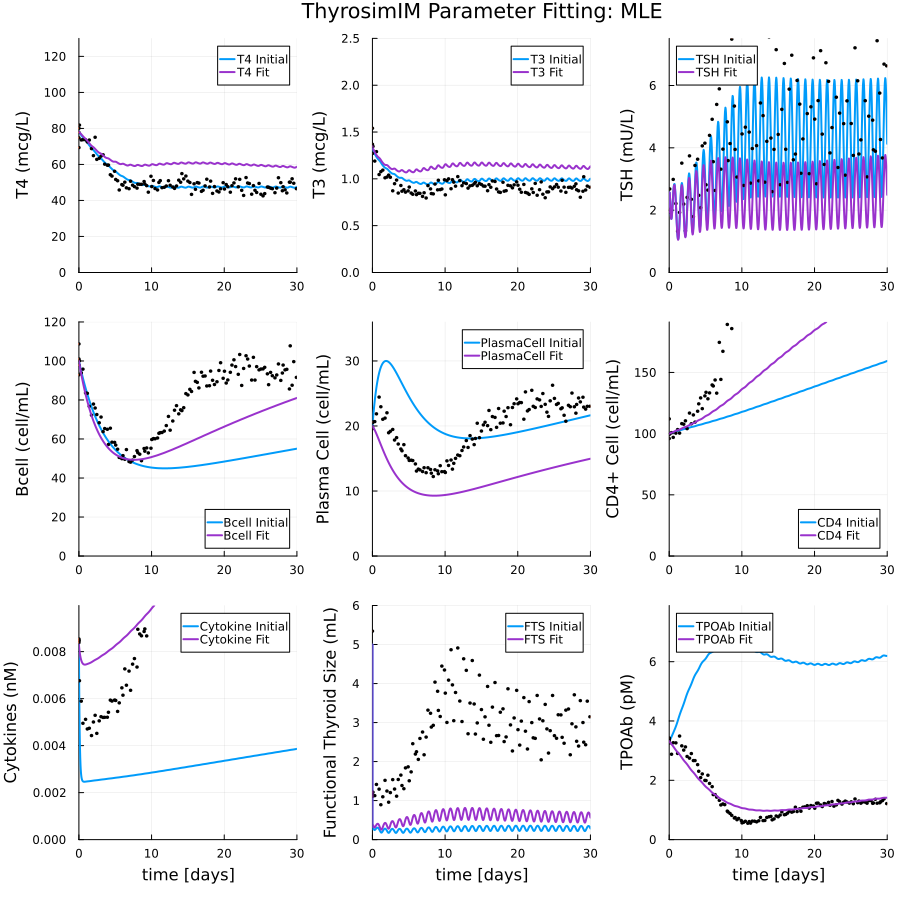

In [131]:
output_plotIM(initial_sol, sol, sample_IM)

In [132]:
print("Estimated variances: ", MLE_trial.minimizer[18:26])

Estimated variances: [0.9983438112868461, 0.8106789813202154, 0.5424880421927699, 0.7300061271849181, 0.7321775348223161, 0.9251505868585836, 2.7116610567007586, 1.182644686461237, 0.871941405758783]

In [74]:
"""
Run parameter estimation on immune parameters. 
"""
function CV_estim(data::DataFrame, p0::Vector, lb::Vector, ub::Vector)

    t = data.t
    ic = ics()    
    sol_index = [1,4,7,20,21,22,23,24,25]
    cols = names(data)[2:10]

    function error(p,t,data)
        tspan = (t[1],t[end])
        prob = ODEProblem(thyrosimIM_estimate, ic, tspan, p)
        sol = solve(prob, Rosenbrock23())

        loss = 0
        for i in 1:size(cols)[1]
            dp = 1
            for time in t
                loss += ((sol(time)[sol_index[i]]-data[!,cols[i]][dp])/mean(data[!,cols[i]]))^2
                dp += 1
            end
        end
        return loss
    end

    function set_lower_bounds(p::Vector, lb::Vector)
        for i in eachindex(p)
            if p[i] < lb[i]
                p[i] = lb[i]
            end
        end
        return p
    end

    function set_upper_bounds(p::Vector, lb::Vector)
        for i in eachindex(p)
            if p[i] >= ub[i]
                p[i] = ub[i]
            end
        end
        return p
    end

    function objective(p_free, lb, ub)
        p_free = set_lower_bounds(p_free, lb)
        p_free = set_upper_bounds(p_free, ub)
        return error(p_free, t, data)
    end

    # Adjust so fitting indicies and parameters can be specified
    result = optimize(p -> objective(p, lb, ub), p0, Newton(),
     Optim.Options(time_limit = 100.0, iterations = 1, g_tol=1e-5, store_trace=true,
     show_trace = true, allow_f_increases=true, extended_trace=true))
end

CV_estim

In [75]:
# Compute one iteration of Newton's method to get an approximation of the 
# hessian at the parameter solution found by Nedler-Mead (takes a while to run)
Estimated_CV = CV_estim(sample_IM, Nedler_parameter, lb, ub)

Iter     Function value   Gradient norm 
     0     3.672154e+00     1.692946e+01
 * Current step size: 1.0
 * time: 0.0009999275207519531
 * g(x): [-16.92945742516889, 7.780541155411152, -0.05695158890034534, -1.2018418909535053e-8, -5.472956437543576e-8, 1.4528463560119522e-8, 10.754946683623071, -0.3010555107612339, 5.558674333634262, 0.2574245145719913, 2.2115505571898715, -0.980926375847757, -2.7559009779332686e-11, 1.3434174627761463e-13, 3.972790614196531e-6, -5.557884562244502, -0.00152475442921757]
 * h(x): [4.0588421531234294e7 -3.287034143537268e6 72950.9303836748 -0.007036381986573579 -0.006060253576328436 0.037412136919678984 -6.711843945079908e6 -2.0744081591453329e6 -5.991318158450551e6 190072.0941742733 -2.9841951486323476e6 -1.154240713505119e6 -1.6145549356285226e-5 -1.8138954062787164e-8 2.953556263443841 3.516609089108959e6 196.48012183147316; -3.287034143537268e6 2.329330821601391e6 -15083.368352249265 -0.00038154029622430033 -0.012448973992423552 0.012957324189566

     1     3.672111e+00     2.872863e+01
 * Current step size: 0.6352365419670452
 * time: 24.049999952316284
 * g(x): [28.728625506120874, -0.3638266218392123, 0.07130913386591703, -8.41041068272803e-9, -3.3908025115795326e-8, 3.9031854444621565e-8, -4.244759136638996, -2.041485928343871, -6.045894960387034, 0.1598537456500499, -2.6583487229133977, -1.8294912332186224, -4.836675508189901e-11, 9.77861690592161e-14, 7.519438932731447e-6, 6.0464634402500295, 0.0005009991567799499]
 * h(x): [4.062822586207044e7 -3.2999522786432803e6 73076.04901212454 -0.0070388624799024415 -0.006014391244568031 0.03742052093657549 -6.426733003744304e6 -2.0758177651045546e6 -6.001738268938705e6 190168.96344725788 -2.9887252216256335e6 -1.15428376118356e6 -1.6169227147257367e-5 -1.9626213236858058e-8 2.9568021486995155 3.560241563295938e6 201.41414451655; -3.2999522786432803e6 2.3348461362395585e6 -15115.73397514224 -0.0003808274775810032 -0.012461778560619474 0.012965927093456817 440709.7419741228 -370768.

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     3.672111e+00

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 1.19e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.13e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.28e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.17e-05 ≰ 0.0e+00
    |g(x)|                 = 2.87e+01 ≰ 1.0e-05

 * Work counters
    Seconds run:   24  (vs limit 100)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   3
    ∇²f(x) calls:  2


In [76]:
Hessian = Estimated_CV.trace[end].metadata["h(x)"]
Grad = Estimated_CV.trace[end].metadata["g(x)"]

17-element Vector{Float64}:
 28.728625506120874
 -0.3638266218392123
  0.07130913386591703
 -8.41041068272803e-9
 -3.3908025115795326e-8
  3.9031854444621565e-8
 -4.244759136638996
 -2.041485928343871
 -6.045894960387034
  0.1598537456500499
 -2.6583487229133977
 -1.8294912332186224
 -4.836675508189901e-11
  9.77861690592161e-14
  7.519438932731447e-6
  6.0464634402500295
  0.0005009991567799499

In [77]:
function symlog(x::Number, base::Real = 10)
    if x == 0
        return 0.0
    else
        sign_x = sign(x)
        return sign_x * (log(abs(x)) / log(base) + 1)
    end
end


symlog (generic function with 2 methods)

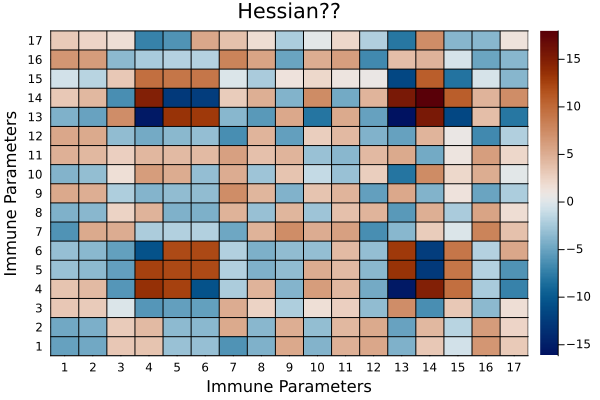

In [89]:
Estimated_CV_df = DataFrame(inv(Hessian), :auto);
grid = 0.5:1:17.5
borders = collect(grid)
Estim_CV = inv(Hessian)
heatmap(symlog.(Estim_CV), c=:vik, title="Hessian??")
xlabel!("Immune Parameters")
ylabel!("Immune Parameters")
xlims!((0.5,17.5)); ylims!((0.5,17.5))
xticks!(0:1:17); yticks!(0:1:17)
vline!(borders, c=:black, label=""); hline!(borders, c=:black, label="")

In [80]:
# symmetry check:
isapprox(Estim_CV, Estim_CV', rtol=1e-12)

true

In [81]:
function normalize_matrix(matrix)
    D = Diagonal(sqrt.(diag(matrix)))
    return inv(D)*matrix*inv(D)
end

normalize_matrix (generic function with 1 method)

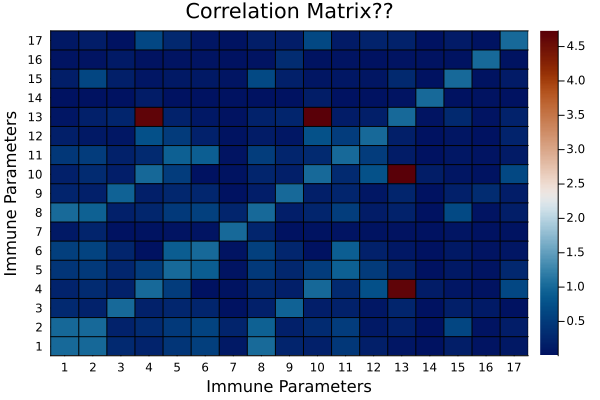

In [88]:
# find correlation matrix from estimated covariance matrix
corr = normalize_matrix(abs.(Estim_CV))
heatmap(corr, c=:vik, title="Correlation Matrix??")
xlabel!("Immune Parameters")
ylabel!("Immune Parameters")
xlims!((0.5,17.5)); ylims!((0.5,17.5))
xticks!(0:1:17); yticks!(0:1:17)
vline!(borders, c=:black, label=""); hline!(borders, c=:black, label="")